In [7]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [8]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)

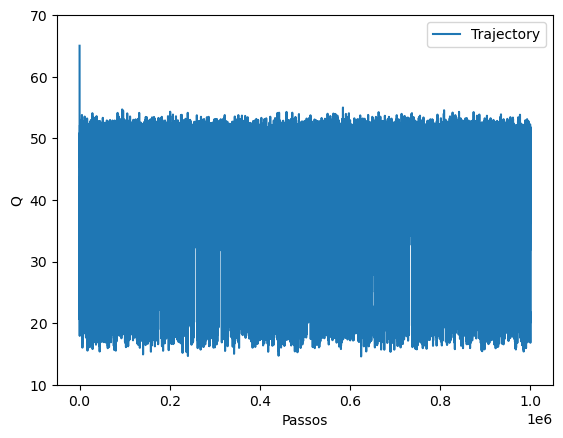

In [15]:
fig, ax = plt.subplots()
ax.plot(x, label = 'Trajectory') 
plt.xlabel('Passos')
plt.ylabel('Q')
plt.ylim([10, 70])
plt.legend()
plt.show()

In [31]:
# Function to calculate the conditional probability p(TP|x)

def distribution_pTP(TP, itc_x):
    return itc_x/x

def distribution_itc_pTP(TP, itc_x):
    return TP*x

# Probability of TP occurring
TP = 0.5

# Probability of the intersection of TP and x occurring
itc_x = 0.5

# Calculating the conditional probability of TP given x
p_TP_x = distribution_pTP(TP, itc_x)

# Calculating the conditional probability of intersection
p_TP = distribution_itc_pTP(TP, itc_x)

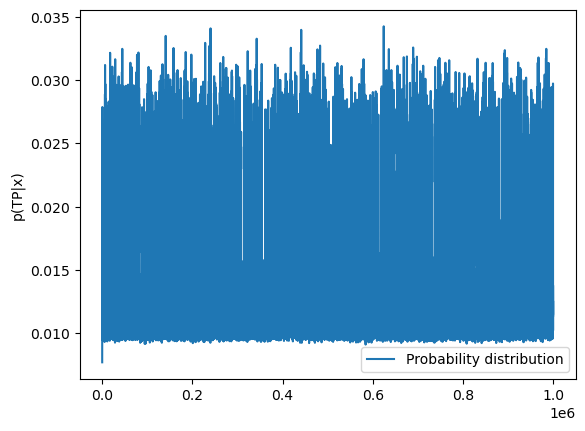

In [24]:
fig, ax = plt.subplots()
ax.plot(p_TP_x, label = 'Probability distribution') 
plt.ylabel('p(TP|x)')
plt.legend()
plt.show()

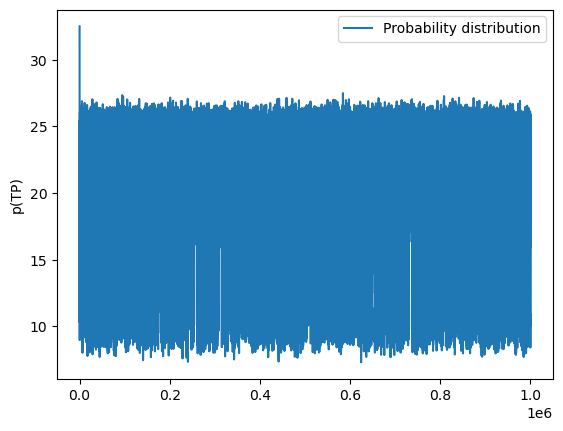

In [30]:
fig, ax = plt.subplots()
ax.plot(p_TP, label = 'Probability distribution') 
plt.ylabel('p(TP)')
plt.legend()
plt.show()